In [94]:
# library
import matplotlib.pyplot as plt
import pandas as pd
from rake_nltk import Rake
from tika import parser
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
def document_to_text(document):
    document = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
#   document = request.FILES['document']
    parsed = parser.from_file(document)
    text = parsed['content']
    if parsed['content'] == None:
        print("The submitted document cannot be read.")
    try:
        text = text.replace('\n', '')
    except:
        pass
    return text

In [96]:
def compile_document_text():
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
#     resume = request.FILES['document']
    resume = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    text = document_to_text(resume)
    data = [['resume', text]]
#     print(data)
    documentdf = pd.DataFrame(data, columns = ['title', 'description'])
    return documentdf

In [97]:
def text_to_bagofwords(df):
    documentdf = compile_document_text()
    documentdf['rake_key_words'] = ''
    r = Rake()
    for index, row in documentdf.iterrows():
        r.extract_keywords_from_text(row['description'])
        key_words_dict_scores = r.get_word_degrees()
        row['rake_key_words'] = list(key_words_dict_scores.keys())
    # Transform key words into bag of words
    documentdf['bag_of_words'] = ''
    for index, row in documentdf.iterrows():
        words = ''
        words += ' '.join(row['rake_key_words']) + ' '
        row['bag_of_words'] = words
    return documentdf

In [98]:
def join_and_condense():
    # Slices
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    text = document_to_text(resume)
    documentdf = compile_document_text()
    documentdf = text_to_bagofwords(documentdf)
    job_descriptions = job_descriptions.append(documentdf)
    recommend_df = job_descriptions[['title', 'bag_of_words']]
    return recommend_df

In [99]:
def vectorize_text():
    count = CountVectorizer()
    recommend_df = join_and_condense()
    count_matrix = count.fit_transform(recommend_df['bag_of_words'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    return cosine_sim

In [100]:
def recommend_10(title, cosine_sim):
    cosine_sim = vectorize_text()
    indices = pd.Series(df['title'])
    recommend_df = join_and_condense()
    recommended_jobs = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)

    for i in top_10_indices:
        recommended_jobs.append(list(df['title'])[i])

    return recommended_jobs

In [101]:
def recommend_100(title, cosine_sim = cosine_sim):
    recommended_jobs = []
    df = join_and_condense()
    indices = pd.Series(df['title'])
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:101].index)

    for i in top_10_indices:
        recommended_jobs.append(list(df['title'])[i])

    return recommended_jobs

In [102]:
def format_recommendations():
    jobs100 = recommend_100('resume')
    jobs10 = []
    for job in jobs100:
        job = job.lower().replace("_", " ").title()
        job = job.replace('Hr Manager', 'HR Manager')
        jobs10.append(job)
    jobs10 = set(jobs10[0:20])
    jobs10 = list(jobs10)
    final_jobs10 = jobs10[0:10]

    for i, item in enumerate(final_jobs10,1):
        print(i, '. ' + item + '\n', sep='',end='')

In [105]:
def top_100_categories():
    df = pd.read_csv('data/job_descriptions.csv', index_col=0)
    jobs100 = recommend_100('resume')
    user_titles = df[df.title.isin(jobs100)]
    user_titles = user_titles[['title', 'category']]
    user_titles.drop_duplicates(subset="title", keep="last")

    categories = list(user_titles.category)
    return categories

In [126]:
def freq(category_list):

    frequency = []
    categories = top_100_categories()

    # gives set of unique words
    unique_words = set(categories)

    for words in unique_words :
        frequency.append(category_list.count(words))
    return frequency



In [138]:
def viz_data():
    
    categories = top_100_categories()
    frequency = freq(categories)
    unique_words = set(categories)
    unique_words = list(unique_words)
    category_values = dict(zip(unique_words, frequency))
    category_dict = {key:val for key, val in category_values.items() if val >= 10}

    # create data
    names=category_dict.keys()
    size=category_dict.values()
    return names, size

In [139]:
def make_viz():
    categories = top_100_categories()
    freq(categories)
    names, size = viz_data()

# Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
    plt.title('Strength Summary')
    plt.pie(size, labels=names)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [140]:
format_recommendations()

1. Program Coordinator
2. Executive Director
3. Budget Analyst
4. Fraud Specialist
5. HR Manager
6. Medical Science Liaison
7. Protective Services Manager
8. Document Management Analyst
9. Account Manager
10. Health Program Manager


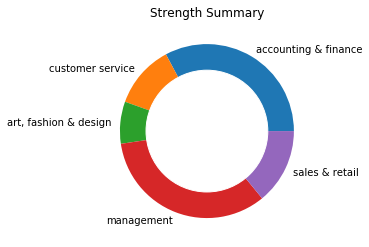

In [141]:
make_viz()